# AutoKeras (AutoML) demos

Note: this notebook uses Colab GPU runtime

## Install AutoKeras

In [1]:
!pip3 install --upgrade tensorflow autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.3 MB/s eta 0:00:00


## AutoKeras Image Classifier

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
import autokeras as ak

clf = ak.ImageClassifier(max_trials=1, overwrite=True)
clf.fit(x_train, y_train)

Trial 1 Complete [00h 04m 24s]
val_loss: 0.03770051151514053

Best val_loss So Far: 0.03770051151514053
Total elapsed time: 00h 04m 24s
Epoch 1/13
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1574 - accuracy: 0.9520
Epoch 2/13
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0735 - accuracy: 0.9766
Epoch 3/13
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0579 - accuracy: 0.9820
Epoch 4/13
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0512 - accuracy: 0.9832
Epoch 5/13
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0440 - accuracy: 0.9862
Epoch 6/13
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0411 - accuracy: 0.9868
Epoch 7/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0383 - accuracy: 0.9879
Epoch 8/13
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0363 - accuracy: 0.9883
Epoch 9/13
1875/1875 [===================

In [4]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

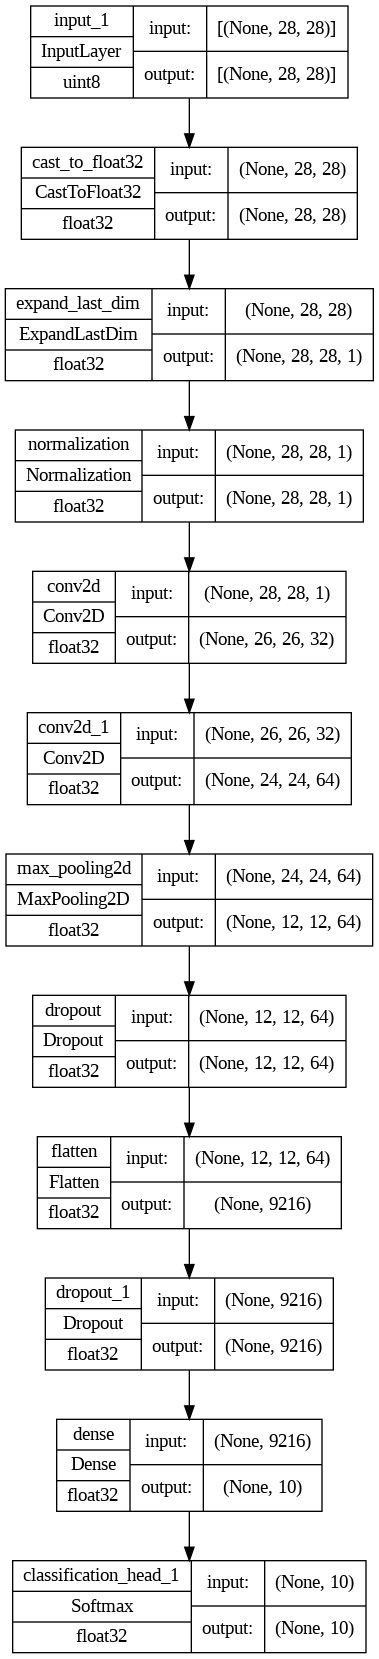

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [6]:
loss, accuracy = clf.evaluate(x_test, y_test)

print(f'Prediction loss: {loss:.4f}')
print(f'Prediction accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0364 - accuracy: 0.9897
Prediction loss: 0.0364
Prediction accuracy: 0.9897


In [7]:
predicted = clf.predict(x_test).flatten().astype('uint8')

313/313 [==============================] - 1s 2ms/step


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



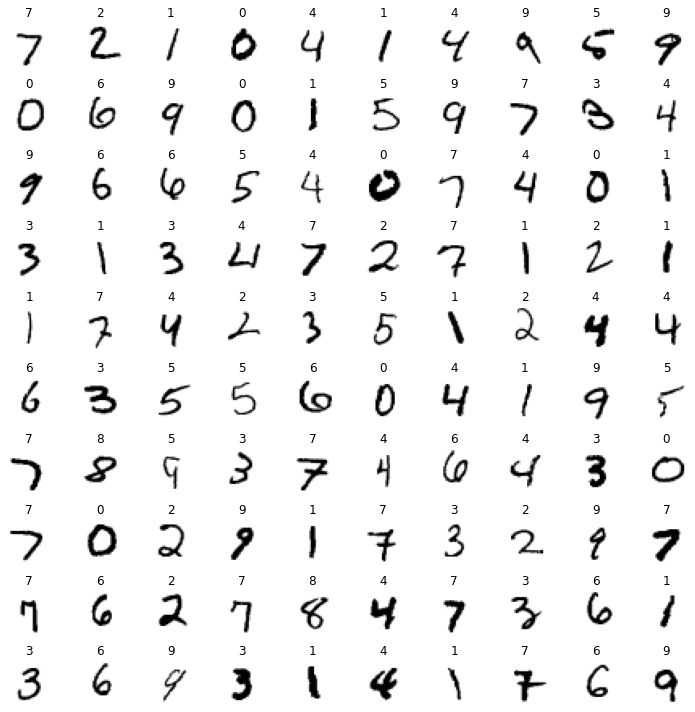

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'{predicted[i]}')

plt.tight_layout()
plt.show()

## AutoKeras Text Classifier

In [10]:
!pip3 install --upgrade nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [11]:
import pandas as pd

df = pd.read_csv('https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/raw/master/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [12]:
import re
rule = r'(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?'
f = lambda t: re.sub(rule, '', t)

df.v2 = df.v2.str.lower()
df.v2 = df.v2.apply(f)

In [13]:
import nltk.corpus
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')
f = lambda t: ' '.join([word for word in t.split() if word not in stop])

df.v2 = df.v2.apply(f)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go jurong point crazy available bugis n great ...,NaN,NaN,NaN
1,ham,ok lar joking wif u oni,NaN,NaN,NaN
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,NaN,NaN,NaN
3,ham,u dun say early hor u c already say,NaN,NaN,NaN
4,ham,nah dont think goes usf lives around though,NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...,NaN,NaN,NaN
5568,ham,b going esplanade fr home,NaN,NaN,NaN
5569,ham,pity mood soany suggestions,NaN,NaN,NaN
5570,ham,guy bitching acted like id interested buying s...,NaN,NaN,NaN


In [15]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.v1 = df.v1.map({'ham': 0, 'spam': 1})
labels = ('ham', 'spam')

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  df.v2.to_numpy(), df.v1.to_numpy(), test_size=0.2, random_state=42)

In [16]:
import autokeras as ak

clf = ak.TextClassifier(max_trials=2, overwrite=True)
clf.fit(x_train, y_train)

Trial 2 Complete [00h 00m 55s]
val_loss: 0.06315227597951889

Best val_loss So Far: 0.06315227597951889
Total elapsed time: 00h 01m 39s
Epoch 1/4
140/140 [==============================] - 25s 134ms/step - loss: 0.3569 - accuracy: 0.8429
Epoch 2/4
140/140 [==============================] - 3s 19ms/step - loss: 0.0901 - accuracy: 0.9758
Epoch 3/4
140/140 [==============================] - 3s 18ms/step - loss: 0.0430 - accuracy: 0.9886
Epoch 4/4
140/140 [==============================] - 2s 13ms/step - loss: 0.0299 - accuracy: 0.9924


In [17]:
model = clf.export_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 expand_last_dim (ExpandLastDim  (None, 1)           0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 text_vectorization (TextVector  (None, 256)         0           ['expand_last_dim[0][0]']        
 ization)                                                                                         
                                                                                              

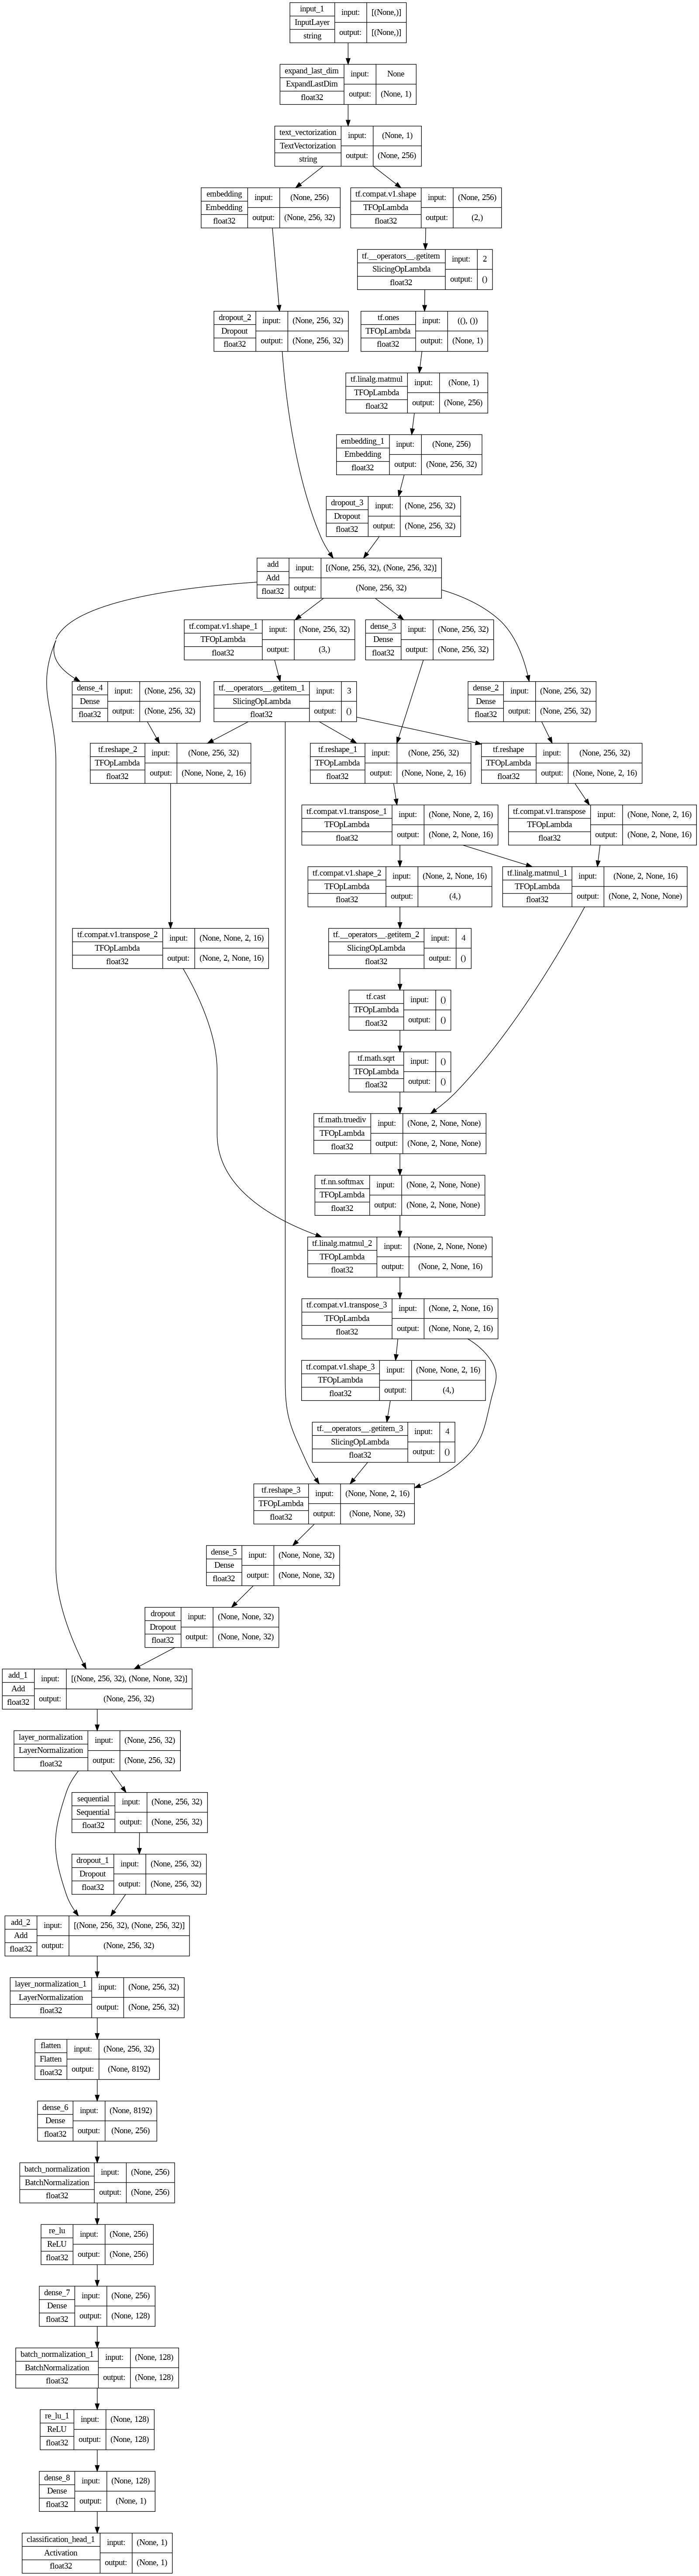

In [18]:
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [19]:
loss, accuracy = clf.evaluate(x_test, y_test)

print(f'Prediction loss: {loss:.4f}')
print(f'Prediction accuracy: {accuracy:.4f}')

35/35 [==============================] - 1s 7ms/step - loss: 0.0656 - accuracy: 0.9821
Prediction loss: 0.0656
Prediction accuracy: 0.9821


In [20]:
predicted = clf.predict(x_test).flatten().astype('uint8')

35/35 [==============================] - 0s 6ms/step


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
for i in range(10):
  print('Test:', x_test[i])
  print('Predict:', labels[predicted[i]])
  print('Real:', labels[y_test[i]])
  print('')

Test: funny fact nobody teaches volcanoes 2 erupt tsunamis 2 arise hurricanes 2 sway aroundn 1 teaches hw 2 choose wife natural disasters happens
Predict: ham
Real: ham

Test: sent scores sophas secondary application schools think thinking applying research cost also contact joke ogunrinde school one less expensive ones
Predict: ham
Real: ham

Test: know someone know fancies call 09058097218 find pobox 6 ls15hb 150p
Predict: spam
Real: spam

Test: promise getting soon youll text morning let know made ok
Predict: ham
Real: ham

Test: congratulations ur awarded either 500 cd gift vouchers free entry 2 100 weekly draw txt music 87066 tncs wwwldewcom1win150ppmx3age16
Predict: spam
Real: spam

Test: ill text carlos let know hang
Predict: ham
Real: ham

Test: ki didt see youkwhere
Predict: ham
Real: ham

Test: messageno responcewhat happend
Predict: ham
Real: ham

Test: get gandhipuram walk cross cut road right side ltgt street road turn first right
Predict: ham
Real: ham

Test: flippin shit